# Reporte 2

Jose Eduardo Mendez Martinez


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
synergy_df=pd.read_csv(filepath_or_buffer="synergy_logistics_database.csv")
synergy_df.describe()

,register_id,year,total_value
count,19056.000000,19056.000000,1.905600e+04
mean,9528.500000,2017.496327,1.131881e+07
std,5501.137701,1.706975,1.536656e+07
min,1.000000,2015.000000,0.000000e+00
25%,4764.750000,2016.000000,6.400000e+04
50%,9528.500000,2017.000000,5.000000e+06
75%,14292.250000,2019.000000,1.600000e+07
max,19056.000000,2020.000000,2.850000e+08


In [4]:
revenue = sinergy['total_value'].sum()
revenue

215691298000

El objetivo de este ánalisis es identificar la mejor estrategia operativa para la empresa

In [27]:
synergy_df.head(5)

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
0,1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
1,2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
2,3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
3,4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
4,5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


In [28]:
synergy_df.tail(5)

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
19051,19052,Imports,Japan,Singapore,2020,27/06/20,Gas turbines,Sea,Union Energy Co,1000000
19052,19053,Imports,Malaysia,Singapore,2020,28/06/20,Gas turbines,Sea,Union Energy Co,2000000
19053,19054,Imports,Malaysia,Singapore,2020,29/06/20,Gas turbines,Sea,Union Energy Co,33000000
19054,19055,Imports,Malaysia,Singapore,2020,30/06/20,Gas turbines,Sea,Union Energy Co,13000000
19055,19056,Imports,Malaysia,Singapore,2020,01/07/20,Gas turbines,Sea,Union Energy Co,30000000


In [8]:
sinergy.groupby(['transport_mode']).count()

,register_id,direction,origin,destination,year,date,product,company_name,total_value
transport_mode,,,,,,,,,
Air,2389,2389,2389,2389,2389,2389,2389,2389,2389
Rail,3381,3381,3381,3381,3381,3381,3381,3381,3381
Road,2598,2598,2598,2598,2598,2598,2598,2598,2598
Sea,10688,10688,10688,10688,10688,10688,10688,10688,10688


Análisis de rutas de importación y exportación por origen y destino

In [36]:
origins=list(synergy_df["origin"].unique())
print(origins)
print(len(origins))

['Japan', 'Germany', 'China', 'Italy', 'USA', 'Russia', 'South Korea', 'Netherlands', 'France', 'Canada', 'Belgium', 'Spain', 'India', 'United Kingdom', 'Australia', 'Brazil', 'Switzerland', 'Mexico', 'Austria', 'Singapore', 'Vietnam', 'Malaysia', 'United Arab Emirates']
23


In [30]:
destinations=list(synergy_df["destination"].unique())
print(destinations)
print(len(destinations))

['China', 'USA', 'South Korea', 'Spain', 'Italy', 'Japan', 'Germany', 'Mexico', 'Brazil', 'France', 'Switzerland', 'United Kingdom', 'Croatia', 'Ireland', 'Belgium', 'Argentina', 'Singapore', 'Canada', 'Netherlands', 'Belorussia', 'Turkey', 'India', 'Vietnam', 'Russia', 'United Arab Emirates', 'Thailand', 'Philippines', 'Peru', 'Austria', 'New Zealand', 'Rusia', 'Slovakia', 'Malaysia', 'Poland']
34


In [38]:
num=len(origins)
rutas= np.empty((num,0)).tolist()
num_rutas=0
for j in range(0,len(origins)):
    for k in range(0,len(destinations)):
            ruta=(synergy_df.origin==origins[j]) & (synergy_df.destination == destinations[k])
            num_rutas+=1
            if ((ruta.value_counts())[0]) != len(ruta):
                #print((ruta.value_counts())[1])
                rutas[j].append((ruta.value_counts())[1])
             
            else:
                rutas[j].append(0)
                      
print("Rutas únicas:")           
print((num_rutas))


Rutas únicas:
782


Realizamos un diccionario que considere únicamente el origen de las rutas

In [40]:
rutas_zip=zip(origins,rutas)
rutas_dict=dict(rutas_zip)
test=zip(destinations,rutas[0])
test_dict=dict(test)
print(test_dict)
len(test_dict)

{'China': 196, 'USA': 140, 'South Korea': 62, 'Spain': 15, 'Italy': 0, 'Japan': 0, 'Germany': 54, 'Mexico': 385, 'Brazil': 306, 'France': 0, 'Switzerland': 21, 'United Kingdom': 0, 'Croatia': 0, 'Ireland': 0, 'Belgium': 0, 'Argentina': 0, 'Singapore': 43, 'Canada': 273, 'Netherlands': 0, 'Belorussia': 0, 'Turkey': 0, 'India': 8, 'Vietnam': 0, 'Russia': 68, 'United Arab Emirates': 76, 'Thailand': 55, 'Philippines': 0, 'Peru': 0, 'Austria': 0, 'New Zealand': 0, 'Rusia': 0, 'Slovakia': 0, 'Malaysia': 0, 'Poland': 0}


34

Realizamos un diccionario para enlazar los origenes con todos los destinos posibles

In [41]:
def dictionaryM (origins,destinations,rutas):
    destinos=[]
    for i in range(len(origins)):
        test=zip(destinations,rutas[i])
        test_dict=dict(test)
        test_sort=sorted(test_dict.items(),key=lambda x:x[1], reverse=True)
        destinos.append(test_sort)
    
    rutas_zip=zip(origins,destinos)
    rutas_dict=dict(rutas_zip)
    return rutas_dict

rutas_dict=dictionaryM(origins,destinations,rutas)
print(rutas_dict)


{'Japan': [('Mexico', 385), ('Brazil', 306), ('Canada', 273), ('China', 196), ('USA', 140), ('United Arab Emirates', 76), ('Russia', 68), ('South Korea', 62), ('Thailand', 55), ('Germany', 54), ('Singapore', 43), ('Switzerland', 21), ('Spain', 15), ('India', 8), ('Italy', 0), ('Japan', 0), ('France', 0), ('United Kingdom', 0), ('Croatia', 0), ('Ireland', 0), ('Belgium', 0), ('Argentina', 0), ('Netherlands', 0), ('Belorussia', 0), ('Turkey', 0), ('Vietnam', 0), ('Philippines', 0), ('Peru', 0), ('Austria', 0), ('New Zealand', 0), ('Rusia', 0), ('Slovakia', 0), ('Malaysia', 0), ('Poland', 0)], 'Germany': [('China', 328), ('France', 299), ('USA', 236), ('Mexico', 231), ('South Korea', 144), ('Italy', 130), ('Canada', 93), ('Brazil', 85), ('United Kingdom', 52), ('Poland', 36), ('India', 30), ('Spain', 0), ('Japan', 0), ('Germany', 0), ('Switzerland', 0), ('Croatia', 0), ('Ireland', 0), ('Belgium', 0), ('Argentina', 0), ('Singapore', 0), ('Netherlands', 0), ('Belorussia', 0), ('Turkey', 0),

Creamos una función para ordenar el diccionario y las listas de destinos por clave de origen para extraer el destino más alto y delimitar nuestras rutas

In [43]:
def dictionaryMSort (origins,rutas_dict):
    mayor_demanda=[]
    for i in range(0,len(origins)):
        mayor_demanda.append(rutas_dict[origins[i]][0])

    mz=zip(origins,mayor_demanda)
    mayor_demanda_dict=dict(mz)
    mayor_demanda_sort=sorted(mayor_demanda_dict.items(),key=lambda x:x[1][1], reverse=True)
    return mayor_demanda_sort
mayor_demanda_sort=dictionaryMSort(origins,rutas_dict)
print(mayor_demanda_sort)

[('South Korea', ('Vietnam', 497)), ('Netherlands', ('Belgium', 437)), ('USA', ('Netherlands', 436)), ('Japan', ('Mexico', 385)), ('China', ('Mexico', 351)), ('Germany', ('China', 328)), ('Australia', ('Singapore', 273)), ('Singapore', ('Thailand', 273)), ('Canada', ('Mexico', 261)), ('Mexico', ('New Zealand', 249)), ('United Kingdom', ('Belgium', 229)), ('France', ('Belgium', 223)), ('Russia', ('Belorussia', 219)), ('India', ('United Arab Emirates', 214)), ('Brazil', ('China', 195)), ('Malaysia', ('Thailand', 195)), ('Spain', ('Germany', 194)), ('Belgium', ('United Kingdom', 146)), ('Italy', ('Germany', 109)), ('Austria', ('Switzerland', 99)), ('Switzerland', ('Russia', 73)), ('United Arab Emirates', ('India', 20)), ('Vietnam', ('United Arab Emirates', 18))]


# Obtenemos las 10 Rutas con mas demanda: 

In [44]:
for i in range(0,10):
    print(mayor_demanda_sort[i][0],mayor_demanda_sort[i][1])

South Korea ('Vietnam', 497)
Netherlands ('Belgium', 437)
USA ('Netherlands', 436)
Japan ('Mexico', 385)
China ('Mexico', 351)
Germany ('China', 328)
Australia ('Singapore', 273)
Singapore ('Thailand', 273)
Canada ('Mexico', 261)
Mexico ('New Zealand', 249)


¿Estas 10 rutas serán las que generen más valor a la empresa?

Filtramos para solo obtener los valores de origen y destino de acuerdo a las combinaciones de rutas existentes:

In [47]:
revenue=np.zeros((23,34))

for j in range(0,len(origins)):
    for k in range(0,len(destinations)):
            ruta_copy=(synergy_df.origin==origins[j]) & (synergy_df.destination == destinations[k])
            if ((ruta_copy.value_counts())[0]) != len(ruta):
                
                for i in range(0,len(ruta_copy)):
                    if ruta_copy[i]:
                        revenue[j][k]+=synergy_df.total_value[i]
             
            else:
                revenue[j][k]=0
                
revenue_dict=dictionaryM(origins,destinations,revenue)
revenue_dict_sorted=dictionaryMSort(origins,revenue_dict)

for i in range(0,10):
    print(revenue_dict_sorted[i][0],revenue_dict_sorted[i][1])


China ('Mexico', 12494000000.0)
Canada ('Mexico', 8450000000.0)
South Korea ('Vietnam', 6877007000.0)
Japan ('Mexico', 5829000000.0)
France ('Belgium', 5538069000.0)
USA ('Mexico', 4710000000.0)
Germany ('Italy', 4541000000.0)
Singapore ('Thailand', 4017000000.0)
Russia ('Belorussia', 3529000000.0)
Malaysia ('Thailand', 3482000000.0)


Determinar si es una buena estrategia enfocarse en las rutas con mayor demanda, obtenemos las rutas con mayor demanda presentes en el listado de las rutas con mayor valor¶

([<matplotlib.patches.Wedge at 0x7fd884013460>,
 [Text(0.15654637770487645, 1.0888035780743386, 'Rutas con mayor valor-demanda: \n $62470000000.0'),
  Text(-0.1565465815871697, -1.0888035487604601, 'Rutas con mayor valor-demanda fuera del top 10: \n $74964000000.0')],
 [Text(0.08538893329356896, 0.593892860767821, '45%'),
  Text(-0.08538904450209256, -0.5938928447784327, '55%')])

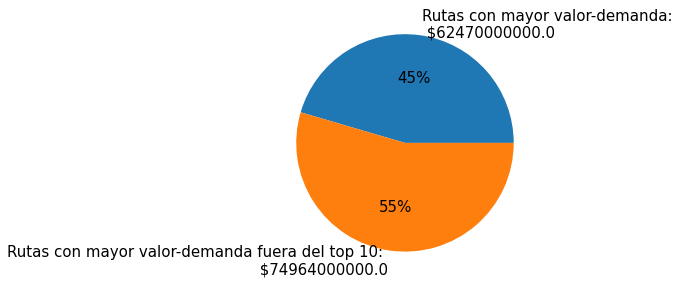

In [59]:
top_rutas=0
top_rutasn=0

for i in range(0,10):
    for j in range (0,10):
        if mayor_demanda_sort[i][0] == revenue_dict_sorted[j][0] and mayor_demanda_sort[i][1][0] == revenue_dict_sorted[j][1][0]:
            top_rutas=top_rutas+revenue_dict_sorted[0][1][1]
        else:
            top_rutasn=top_rutas+revenue_dict_sorted[0][1][1]
valores=[top_rutas,top_rutasn]
labels=['Rutas con mayor valor-demanda: \n $'+ str(top_rutas), 'Rutas con mayor valor-demanda fuera del top 10: \n $'+ str(top_rutasn)]
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
plt.pie(valores,labels=labels,autopct='%0.0f%%')

El top 10 de Rutas solo representa el 45% del valor total por lo que no es el mejor enfoque

# LOS MEDIOS DE TRANSPORTE MAS IMPORTANTES:

In [60]:
value_transport_mode = sinergy.groupby(['transport_mode']).sum()
value_transport_mode

,register_id,year,total_value
transport_mode,,,
Air,18686086,4819659,38262147000
Rail,32521472,6821063,43628043000
Road,23256105,5241426,33270486000
Sea,107111433,21563262,100530622000


{'Sea': 10688, 'Air': 2389, 'Rail': 3381, 'Road': 2598}


Text(0.5, 1.0, 'Medios de transporte más utilizados en importaciones y exportaciones')

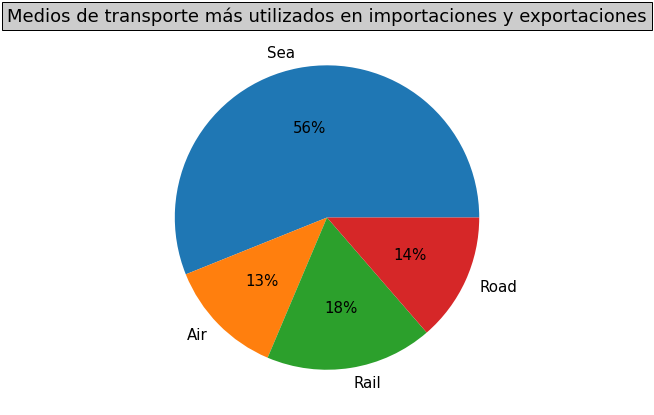

In [69]:
def SimpleDict(transport_type,transport_count):
    zt=zip(transport_type,transport_count)
    transport_types_dict=dict(zt)
    return transport_types_dict
transport_type=list(synergy_df["transport_mode"].unique())
transport_count=[0]*4
for i in range(0,len(transport_type)):
    transport_counter=(synergy_df.transport_mode== transport_type[i])
    transport_count[i]=(transport_counter.value_counts()[1])

transport_types_dict=SimpleDict(transport_type,transport_count)
print(transport_types_dict)
valores=transport_count
labels=transport_type
plt.figure(figsize=(7,7))
plt.rcParams['font.size'] = 15
plt.pie(valores,labels=labels,autopct='%0.0f%%')
plt.title("Medios de transporte más utilizados en importaciones y exportaciones", bbox={'facecolor':'0.8', 'pad':5})

El medio de transporte principal es marítimo pero es necesario validar en cuanto a las importaciones y exportaciones

In [76]:
synergy_df.transport_mode
revenue_transports=np.zeros(len(transport_type))
revenue_transports_mean=np.zeros(len(transport_type))
for i in range(0,len(transport_type)):
    filtro_transport=synergy_df.transport_mode==transport_type[i]
    revenue_transports[i]=synergy_df[filtro_transport].total_value.sum()
    revenue_transports_mean[i]=synergy_df[filtro_transport].total_value.mean()


revenue_transports_dict=SimpleDict(transport_type,revenue_transports)
revenue_transports_mean_dict=SimpleDict(transport_type,revenue_transports_mean)
revenue_transports_dict_sort=sorted(revenue_transports_dict.items(),key=lambda x:x[1], reverse=True)
revenue_transports_mean_sort=sorted(revenue_transports_mean_dict.items(),key=lambda x:x[1], reverse=True)


for i in range(0,len(revenue_transports_dict_sort)):
    print("["+str(i+1)+"] "+"Medio de transporte: "+str(revenue_transports_dict_sort[i][0])+": $",revenue_transports_dict_sort[i][1])

print("\n VALOR PROMEDIO: \n ")
for i in range(0,len(revenue_transports_dict_sort)):
    print("["+str(i+1)+"] "+"Medio de transporte: "+str(revenue_transports_mean_sort[i][0])+": $",revenue_transports_mean_sort[i][1])

[1] Medio de transporte: Sea: $ 100530622000.0
[2] Medio de transporte: Rail: $ 43628043000.0
[3] Medio de transporte: Air: $ 38262147000.0
[4] Medio de transporte: Road: $ 33270486000.0

 VALOR PROMEDIO: 
 
[1] Medio de transporte: Air: $ 16015967.76894098
[2] Medio de transporte: Rail: $ 12903887.311446318
[3] Medio de transporte: Road: $ 12806191.68591224
[4] Medio de transporte: Sea: $ 9405933.944610778


Text(0.5, 1.0, 'Valor promedio de importaciones y exportaciones')

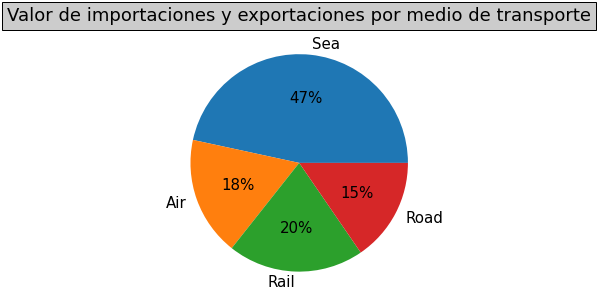

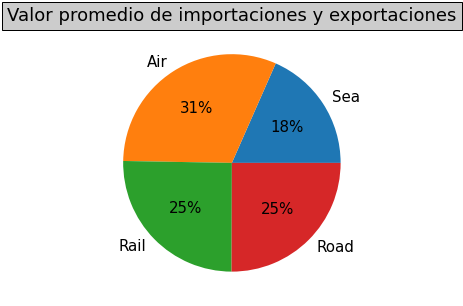

In [83]:
valores=revenue_transports
labels=transport_type
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
plt.pie(valores,labels=labels,autopct='%0.0f%%')
plt.title("Valor de importaciones y exportaciones por medio de transporte", bbox={'facecolor':'0.8', 'pad':5})
transport_type_mean=transport_type
valores_m=revenue_transports_mean
labels=transport_type_mean
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
plt.pie(valores_m,labels=labels,autopct='%0.0f%%')
plt.title("Valor promedio de importaciones y exportaciones", bbox={'facecolor':'0.8', 'pad':5})

Los resultados indican que aunque el medio de transporte maritimo es el que más flujo total de valor representa esto es por ser el medio de transporte más utilizado, tiene un margen de valor agregado más bajo en comparación a los otros medios de transporte, se representan mejores ganancias por via Aerea.¶

# ¿Será una buena estrategia enfocarse en el valor total de importaciones y exportaciones?

Observamos nuestros datos:

In [84]:
value_products = sinergy.groupby(['product']).sum()
value_products.sort_values(by = 'total_value', ascending = False)

,register_id,year,total_value
product,,,
Cars,54990104,9705633,38669250000
Computers,8634410,1985846,23957000000
Pharmaceuticals,12239050,2267705,18480873000
Machinery and electronics,17557265,2820007,16616843000
Integrated circuits,9982745,2322026,14341146000
Smartphones,5434143,1594348,13830046000
Aerospace Parts,7028125,2255215,11073306000
Crude Petroleum,1188580,1022958,8731000000
Cosmetics,4503607,942355,8451185000


In [85]:
value_products_shipments = sinergy.groupby(['product']).count().sort_values(by = 'register_id',ascending= False)
value_products_shipments

,register_id,direction,origin,destination,year,date,transport_mode,company_name,total_value
product,,,,,,,,,
Cars,4810,4810,4810,4810,4810,4810,4810,4810,4810
Machinery and electronics,1398,1398,1398,1398,1398,1398,1398,1398,1398
Integrated circuits,1151,1151,1151,1151,1151,1151,1151,1151,1151
Pharmaceuticals,1124,1124,1124,1124,1124,1124,1124,1124,1124
Aerospace Parts,1118,1118,1118,1118,1118,1118,1118,1118,1118
Meat,1011,1011,1011,1011,1011,1011,1011,1011,1011
Computers,984,984,984,984,984,984,984,984,984
Coal Briquettes,863,863,863,863,863,863,863,863,863
Smartphones,790,790,790,790,790,790,790,790,790


DATOS POR AÑO

In [95]:
year_value_per_id = sinergy.groupby(['year']).sum().sort_values(by = 'register_id', ascending = False)
year_value_per_id

,register_id,total_value
year,,
2020,31238526,40040240000
2019,31027055,40941485000
2018,30549039,37133978000
2017,30079591,34428765000
2016,29493020,32148438000
2015,29187865,30998392000


Nos enfocamos en los países involucrados en origen-destino para obtener el valor por país de acuerdo a importaciones y exportaciones de manera general

In [96]:
exp=origins+destinations
paises_e=set(exp)
paises=list(paises_e)
revenue_paises=np.zeros(len(paises))
revenue_paises_mean=np.zeros(len(paises))
total=0
for i in range(0,len(paises)):
    filtro_pais=synergy_df.origin==paises[i] 
    filtro_pais_2=synergy_df.destination==paises[i]
    revenue_paises[i]=(synergy_df[filtro_pais].total_value.sum())+(synergy_df[filtro_pais_2].total_value.sum())
    total=total+revenue_paises[i]
    revenue_paises_mean[i]=((synergy_df[filtro_pais].total_value.mean())+(synergy_df[filtro_pais_2].total_value.mean()))/2

revenue_paises_dict=SimpleDict(paises,revenue_paises)
revenue_paises_mean_dict=SimpleDict(paises,revenue_paises_mean)
revenue_paises_sort=sorted(revenue_paises_dict.items(),key=lambda x:x[1], reverse=True)
revenue_paises_mean_sort=sorted(revenue_paises_mean_dict.items(),key=lambda x:x[1], reverse=True)
print(revenue_paises_sort)

[('China', 59042038000.0), ('Mexico', 43249770000.0), ('USA', 40563715000.0), ('Japan', 34648128000.0), ('Germany', 32005684000.0), ('South Korea', 25831814000.0), ('France', 25780881000.0), ('Russia', 15915219000.0), ('Belgium', 15687380000.0), ('Canada', 15019779000.0), ('Thailand', 14082000000.0), ('Italy', 12744013000.0), ('Spain', 12353191000.0), ('United Kingdom', 11176285000.0), ('Brazil', 10271016000.0), ('United Arab Emirates', 9256119000.0), ('Singapore', 7970811000.0), ('Netherlands', 7884608000.0), ('Vietnam', 7417007000.0), ('India', 6142000000.0), ('Argentina', 4860036000.0), ('Malaysia', 3560218000.0), ('Belorussia', 3529000000.0), ('Switzerland', 2994346000.0), ('Australia', 2570000000.0), ('Poland', 2188000000.0), ('Turkey', 1446000000.0), ('Ireland', 1147123000.0), ('Rusia', 989046000.0), ('Croatia', 699000000.0), ('Philippines', 344000000.0), ('New Zealand', 9382000.0), ('Austria', 3056000.0), ('Peru', 1673000.0), ('Slovakia', 258000.0)]


Buscamos los países que generan el 80% de valor de exportaciones e importaciones:

In [97]:
meta=total*0.8
paises_80=list()
montos_80=list()
l=0
monto=0
while monto < meta:
    monto=monto+revenue_paises_sort[l][1]
    paises_80.append(revenue_paises_sort[l][0])
    montos_80.append(revenue_paises_sort[l][1])
    print("["+str(l+1)+"] "+str(paises_80[l])+":          $"+str(revenue_paises_sort[l][1]))
    l+=1

[1] China:          $59042038000.0
[2] Mexico:          $43249770000.0
[3] USA:          $40563715000.0
[4] Japan:          $34648128000.0
[5] Germany:          $32005684000.0
[6] South Korea:          $25831814000.0
[7] France:          $25780881000.0
[8] Russia:          $15915219000.0
[9] Belgium:          $15687380000.0
[10] Canada:          $15019779000.0
[11] Thailand:          $14082000000.0
[12] Italy:          $12744013000.0
[13] Spain:          $12353191000.0


De los 35 paises solo 13 representan el 80% de valor generado para la empresa

Text(0.5, 1.0, 'Valor de importaciones y exportaciones por país')

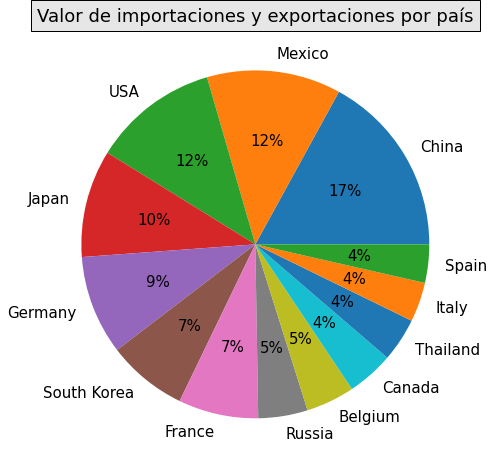

In [104]:
valores=montos_80
labels=paises_80
plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = 15
plt.pie(valores,labels=labels,autopct='%0.0f%%')
plt.title("Valor de importaciones y exportaciones por país", bbox={'facecolor':'0.9', 'pad':6})

Dentro de los países que generan el 80% encontramos que 51% de ellos se distribuye solo en 4 países (China, México, USA, Japon), se podrían mejorar los mercados de este 80% de países que generan buenas ganancias para mejorar

# CONCLUCIONES:

Enfocarse en las rutas no es la mejor opción, la frecuencia con la cual las rutas han sido usadas por la empresa puede variar alguna ruta pudo ser muy frecuente durante los primeros 2 años de operación pero luego pudo disminuir en cuanto a su frecuencia de uso e ingresos. La ruta (South Korea-Vietnam) ha sido la más usada con un total de 497 operaciones, sin embargo no es la ruta que ha generado el mayor de los ingresos, la ruta (China-México) siendo la quinta ruta más frecuente supera a la primera con casi el doble de ingresos generados.

En cuanto a los medios de transporte utilizados se obtuvo que los más frecuentes son los marítimos pero considerando el total de ingresos contra el promedio de los mismos es más conveniente y genera más ganancias usar medios Aéreos que Marítimos 

Ingresos/frecuencia de uso:

Marítimos: (100,530,622,000 / 10688) = 9,405,933.9 
Carril: (43,628,043,000 / 3381) = 12,903,887.3 
Aéreo: (38,262,147,000 / 2389) = 16,015,967.7 
Carretera: (33,270,486,000 / 2598) = 12,806,191.6

Tomar a los países que han generado el 80% de los ingresos de la empresa como prioridad, puede ayudar a realizar mejoras y a aumentar la cartera de productos y servicios por parte de la empresa. Se deben considerar todos los países y el liderazgo de China, México, USA y Japón ya que sirven de ejemplo para aumentar mejoras en los países que vienen por debajo

¿Entonces cuál sería la mejor estrategia para Synergy Logistics?

Synergy Logistics debe planificar su estrategia para 2021 con las siguientes bases:

Enfocarse principalmente en los países más relevantes que hacen uso de su servicio y le han generado el 80% de sus ingresos para dar más soporte a las ganancias mejorando precios, formas de envío, productos y sucursales en estos países.
 						
Como mejora:

1.- Se deberían aumentar más servicios a través de los medios aéreos y de carril que de los marítimos ya que generan mayores ingresos y son más eficientes en tiempo. 

2.- Trabajar también en un análisis en cuanto a mayor demanda de productos. El año 2019 ha sido el mejor año en cuanto a ingresos de la empresa, considerando los datos de 2019 y 2020, se obtuvo que los productos más distribuidos han sido computadoras y carros.

